# BMW Car Sales Data Preparation & Cleaning
# INFO-523 Final Project | Min Set Khant (Solo)

In [35]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [36]:
# Load the Dataset
# Load the dataset from the parent folder's data directory
df= pd.read_csv("../data/bmw_worldwide_sales.csv")
# quick snapshot
print("shape:", df.shape)
display(df.head(10))
display(df.info())
display(df.describe(include='all').T)


shape: (50000, 11)


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,High
7,M5,2014,Asia,Black,Diesel,Automatic,1.6,121156,102778,632,Low
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944,High
9,i8,2019,Europe,White,Electric,Manual,3.0,35700,96257,4411,Low


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Model,50000,11,7 Series,4666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,50000.0,NaN,NaN,NaN,2017.0157,4.324459,2010.0,2013.0,2017.0,2021.0,2024.0
Region,50000,6,Asia,8454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,50000,6,Red,8463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type,50000,4,Hybrid,12716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,50000,2,Manual,25154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine_Size_L,50000.0,NaN,NaN,NaN,3.24718,1.009078,1.5,2.4,3.2,4.1,5.0
Mileage_KM,50000.0,NaN,NaN,NaN,100307.20314,57941.509344,3.0,50178.0,100388.5,150630.25,199996.0
Price_USD,50000.0,NaN,NaN,NaN,75034.6009,25998.248882,30000.0,52434.75,75011.5,97628.25,119998.0
Sales_Volume,50000.0,NaN,NaN,NaN,5067.51468,2856.767125,100.0,2588.0,5087.0,7537.25,9999.0


## Cleaning & standardization of BMW car sales dataset for analysis and modeling.

In [39]:
# Copy original for safety
df_raw = df.copy()

# Normalize column names
df.columns = [c.strip() for c in df.columns]

# Standardzing string columns
str_cols = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Sales_Classification']
for c in str_cols:
    df[c] = df[c].astype(str).str.strip().replace({'nan': np.nan})
    df[c] = df[c].str.title() 

In [40]:
#  Fix Year and numeric types
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
num_cols = ['Engine_Size_L','Mileage_KM','Price_USD','Sales_Volume']
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [42]:
# Add Derived Feature — Car Age
CURRENT_YEAR = 2025
df['Car_Age'] = CURRENT_YEAR - df['Year']

In [44]:
# Transmission normalization
df['Transmission'] = df['Transmission'].replace({
    'Auto': 'Automatic',
    'Man': 'Manual',
    'Automated Manual': 'Automatic'
})


In [45]:
# If fuel is present as one-hot, consolidate:
if set(['Fuel_Type_Petrol','Fuel_Type_Hybrid','Fuel_Type_Electric']).issubset(df.columns):
    df['Fuel_Type'] = np.select(
        [df['Fuel_Type_Petrol'] == True, df['Fuel_Type_Hybrid'] == True, df['Fuel_Type_Electric'] == True],
        ['Petrol','Hybrid','Electric'],
        default=np.nan
    )
    df['Fuel_Type'] = df['Fuel_Type'].fillna('Other')

In [53]:
# Create log Price feature for modeling
df['Log_Price_USD'] = np.log1p(df['Price_USD'])


In [49]:
# Missing Value and duplicate Handling
dups = df.duplicated().sum()
print("duplicates:", dups)
if dups>0:
    df = df.drop_duplicates()

duplicates: 0


In [52]:
# imputation:
df['Engine_Size_L'] = df.groupby('Model')['Engine_Size_L'].transform(lambda x: x.fillna(x.median()))
df['Engine_Size_L'] = df['Engine_Size_L'].fillna(df['Engine_Size_L'].median())
# Drop rows missing the target Price_USD
df = df[~df['Price_USD'].isna()].copy()
# After cleaning
print("shape after cleaning:", df.shape)
print(df.isna().sum())

shape after cleaning: (50000, 13)
Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
Car_Age                 0
Log_Price_USD           0
dtype: int64


## Outlier detection & handling 

In [56]:
from scipy import stats
# Flag extreme price outliers using IQR:
def flag_outliers_iqr(series, k=1.5):
    q1, q3 = series.quantile([0.25,0.75])
    iqr = q3 - q1
    lower, upper = q1 - k*iqr, q3 + k*iqr
    return (series < lower) | (series > upper), lower, upper

for col in ['Price_USD','Mileage_KM','Engine_Size_L','Sales_Volume']:
    mask, low, up = flag_outliers_iqr(df[col].dropna())
    pct = mask.mean()*100
    print(f"{col}: outlier pct ~ {pct:.2f}%, lower={low:.2f}, upper={up:.2f}")

# Option: keep but cap at 1st/99th percentiles
for col in ['Price_USD','Mileage_KM','Sales_Volume']:
    lower, upper = df[col].quantile(0.01), df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

Price_USD: outlier pct ~ 0.00%, lower=-15355.50, upper=165418.50
Mileage_KM: outlier pct ~ 0.00%, lower=-100500.38, upper=301308.62
Engine_Size_L: outlier pct ~ 0.00%, lower=-0.15, upper=6.65
Sales_Volume: outlier pct ~ 0.00%, lower=-4835.88, upper=14961.12


## Feature engineering (Useful Features)

In [57]:
# Create the feautures 
# Price per KM
df['Price_per_KM'] = df['Price_USD'] / (df['Mileage_KM'].replace(0, np.nan))
df['Price_per_KM'] = df['Price_per_KM'].fillna(df['Price_per_KM'].median())

In [58]:
# Engine size buckets
df['Engine_Bin'] = pd.cut(df['Engine_Size_L'], bins=[0,1.6,2.0,3.0,4.0,10],
                          labels=['<=1.6','1.7-2.0','2.1-3.0','3.1-4.0','>4.0'])

# Age bucket
df['Age_Bin'] = pd.cut(df['Car_Age'], bins=[-1,1,3,6,10,30], labels=['0-1','2-3','4-6','7-10','10+'])

# Model popularity (sales per model)
model_sales = df.groupby('Model')['Sales_Volume'].sum().reset_index().rename(columns={'Sales_Volume':'Total_Sales_Model'})
df = df.merge(model_sales, on='Model', how='left')

## Exploratory Visualizations

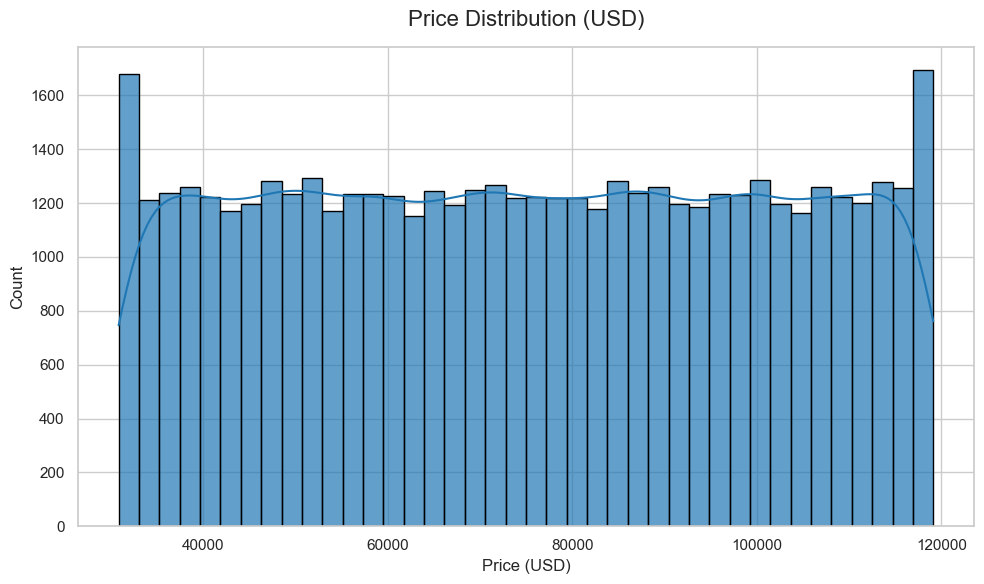

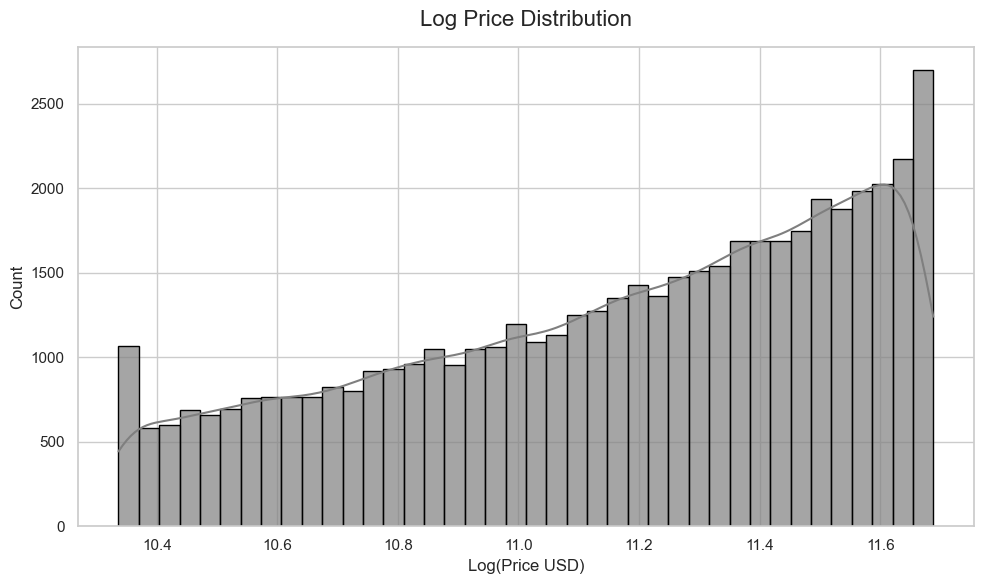

In [114]:
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(
    df['Price_USD'],
    bins=40,
    kde=True,
    color='#1f77b4',  
    edgecolor='black',
    alpha=0.7
)
plt.title("Price Distribution (USD)", fontsize=16, pad=15)
plt.xlabel("Price (USD)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

# Log Price Distribution 
plt.figure(figsize=(10, 6))
sns.histplot(
    df['log_Price_USD'],
    bins=40,
    kde=True,
    color='#7f7f7f',   
    edgecolor='black',
    alpha=0.7
)
plt.title("Log Price Distribution", fontsize=16, pad=15)
plt.xlabel("Log(Price USD)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()



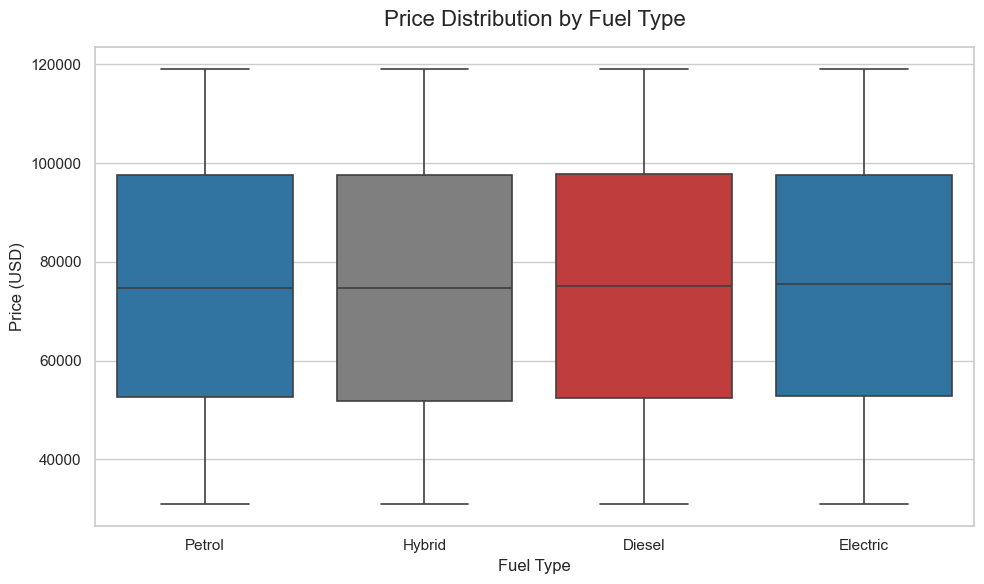

In [115]:
# Price by Fuel Type (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Fuel_Type',
    y='Price_USD',
    palette=['#1f77b4', '#7f7f7f', '#d62728'], 
    fliersize=5,   
    linewidth=1.2
)
plt.title("Price Distribution by Fuel Type", fontsize=16, pad=15)
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.tight_layout()
plt.show()

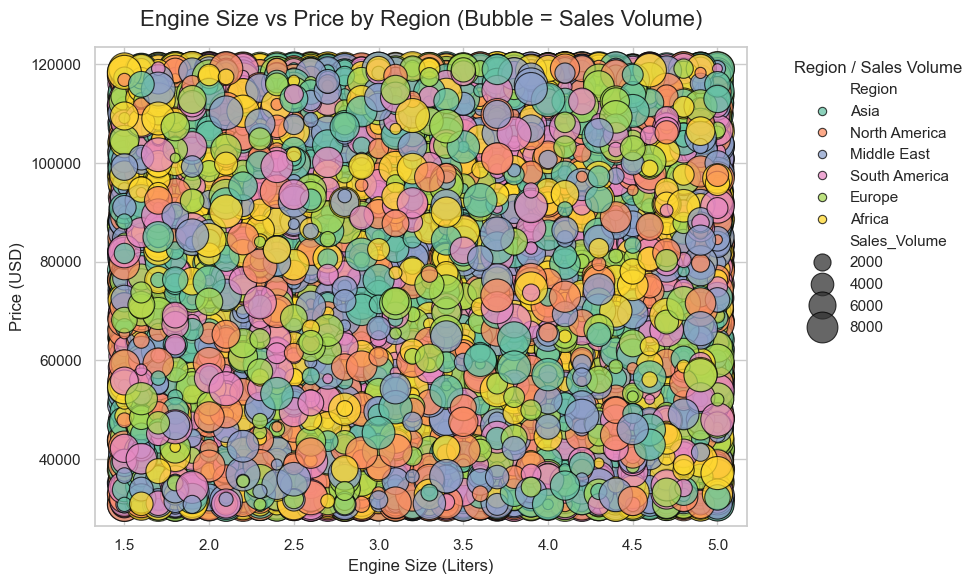

In [ ]:
# Engine Size vs Price (bubble chart) 
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Engine_Size_L',
    y='Price_USD',
    hue='Region',
    size='Sales_Volume',
    sizes=(50, 600),
    alpha=0.75,
    edgecolor='black',
    linewidth=0.8,
    palette='Set2'  
)
plt.title("Engine Size vs Price by Region (Bubble = Sales Volume)", fontsize=16, pad=15)
plt.xlabel("Engine Size (Liters)", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend(
    title="Region / Sales Volume",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=False
)
plt.tight_layout()
plt.show()

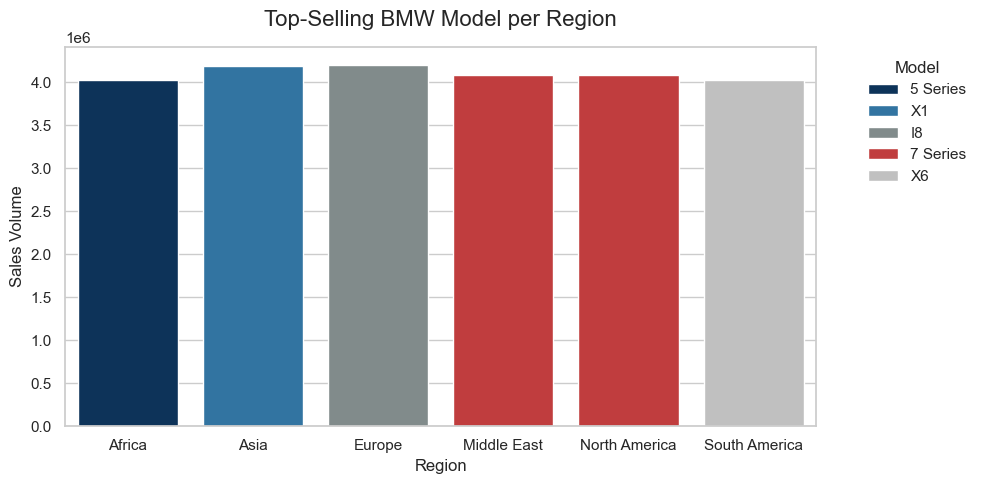

In [ ]:
# Top-selling models by region 
region_model_sales = (
    df.groupby(['Region', 'Model'])['Sales_Volume']
      .sum()
      .reset_index()
)
# Pick the top-selling model in each region
top_per_region = region_model_sales.loc[
    region_model_sales.groupby('Region')['Sales_Volume'].idxmax()
]
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_per_region,
    x='Region',
    y='Sales_Volume',
    hue='Model',
    dodge=False,
    palette=['#003366', '#1f77b4', '#7f8c8d', '#d62728', '#c0c0c0']  
)
plt.title("Top-Selling BMW Model per Region", fontsize=16, pad=15)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Sales Volume", fontsize=12)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.show()

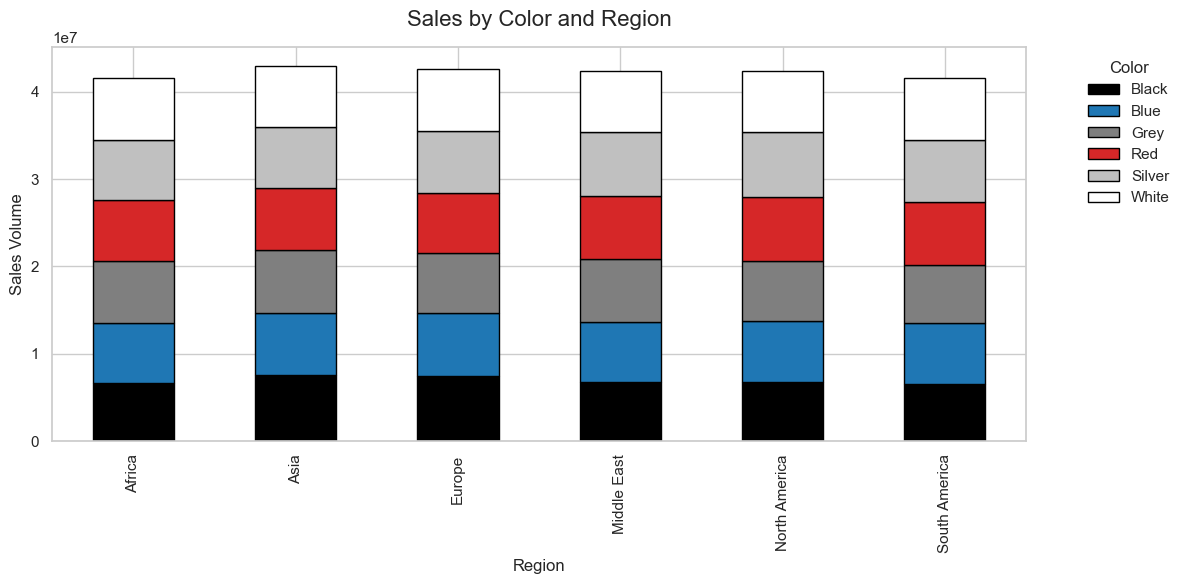

In [118]:
# Sales by Color and Region
# Create the pivot table
pivot_color = (
    df.groupby(['Region', 'Color'])['Sales_Volume']
      .sum()
      .unstack()
      .fillna(0)
)
# Plot
pivot_color.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['#000000', '#1f77b4', '#7f7f7f', '#d62728', '#c0c0c0', '#ffffff'],
    edgecolor='black'
)

plt.title("Sales by Color and Region", fontsize=16, pad=15)
plt.ylabel("Sales Volume", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.legend(title="Color", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.show()


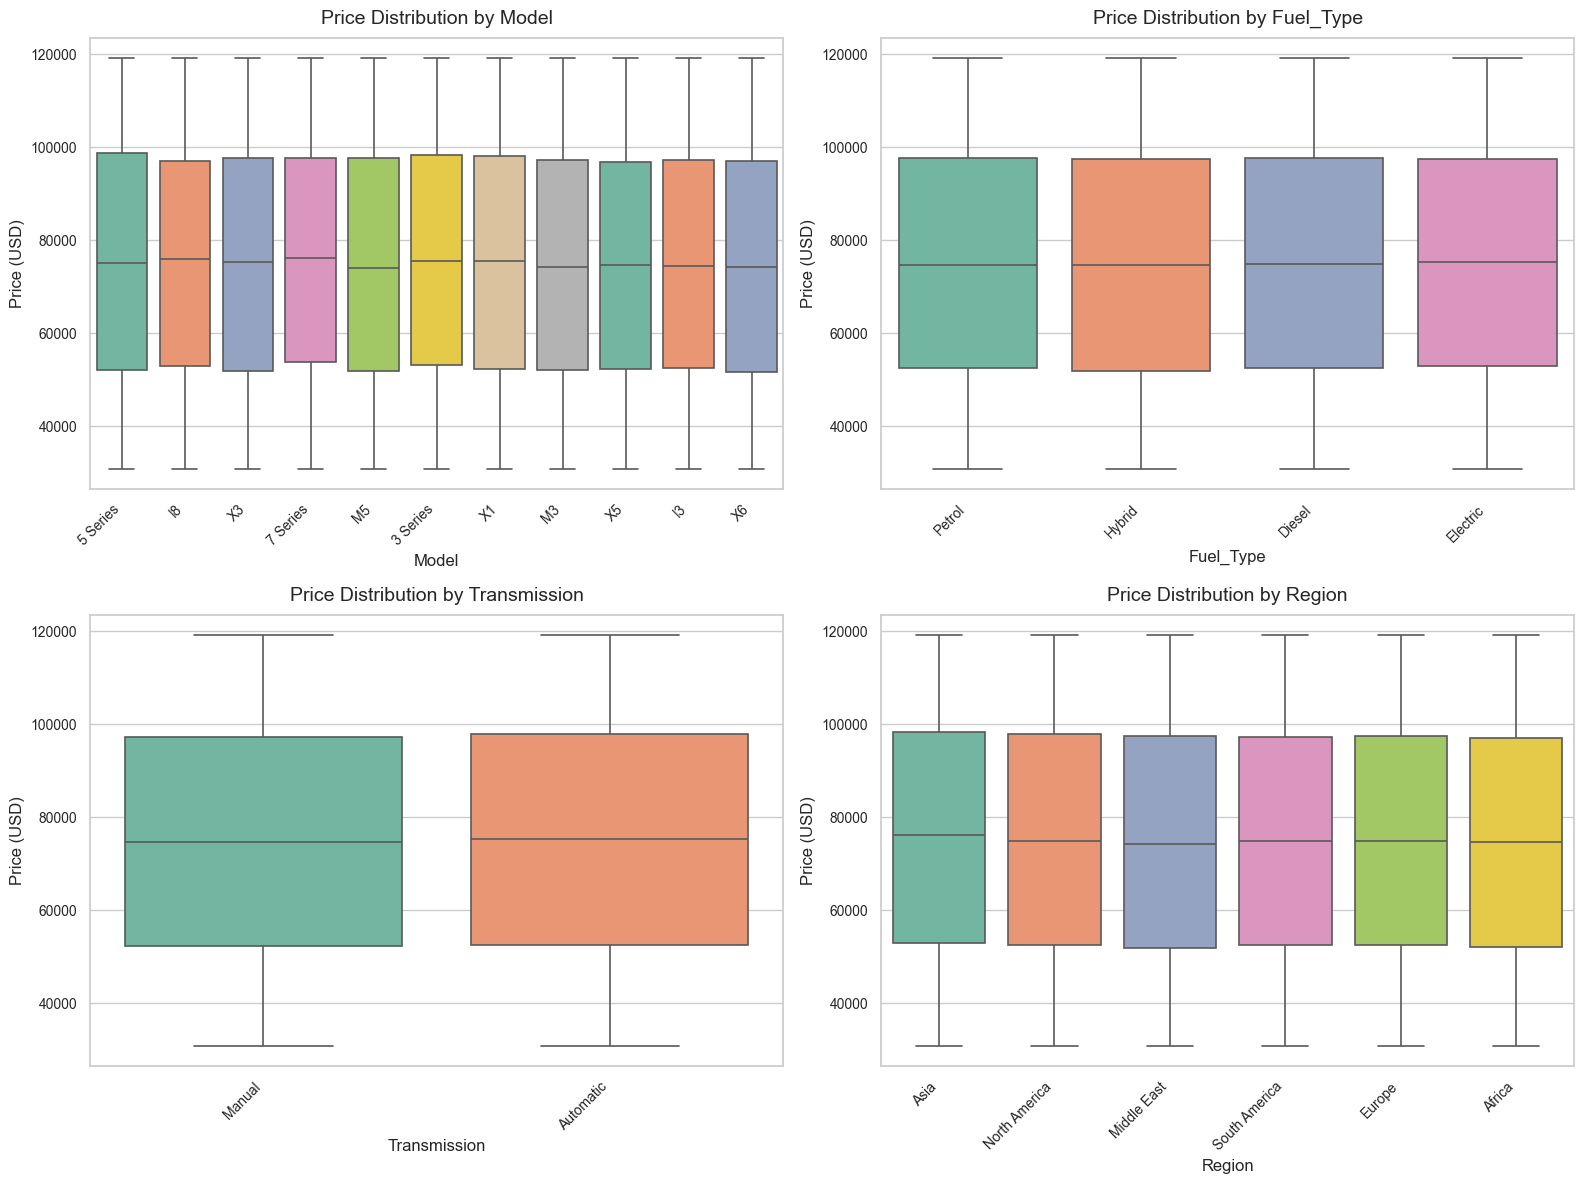

In [121]:
# Price Relationships by Feature
# Categorical features for boxplots 
cat_features = ['Model', 'Fuel_Type', 'Transmission', 'Region']

plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")
palette = sns.color_palette("Set2")  

for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(
        x=col,
        y='Price_USD',
        data=df,
        palette=palette,
        fliersize=5,
        linewidth=1.2
    )
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.title(f'Price Distribution by {col}', fontsize=14, pad=10)
    plt.ylabel("Price (USD)", fontsize=12)
    plt.xlabel(col, fontsize=12)

plt.tight_layout()
plt.show()

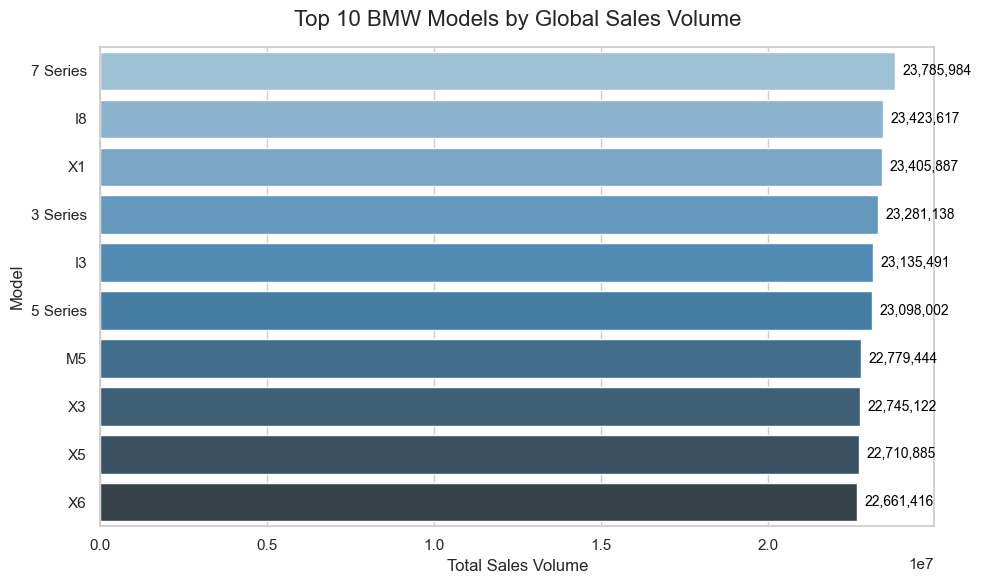

In [ ]:
# Top 10 Models by Sales Volume 
top_models = df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
palette = sns.color_palette("Blues_d", n_colors=10)  

barplot = sns.barplot(
    x=top_models.values,
    y=top_models.index,
    palette=palette
)
for i, v in enumerate(top_models.values):
    barplot.text(v + max(top_models.values)*0.01, i, f"{v:,}", color='black', va='center', fontsize=10)

plt.title("Top 10 BMW Models by Global Sales Volume", fontsize=16, pad=15)
plt.xlabel("Total Sales Volume", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.tight_layout()
plt.show()



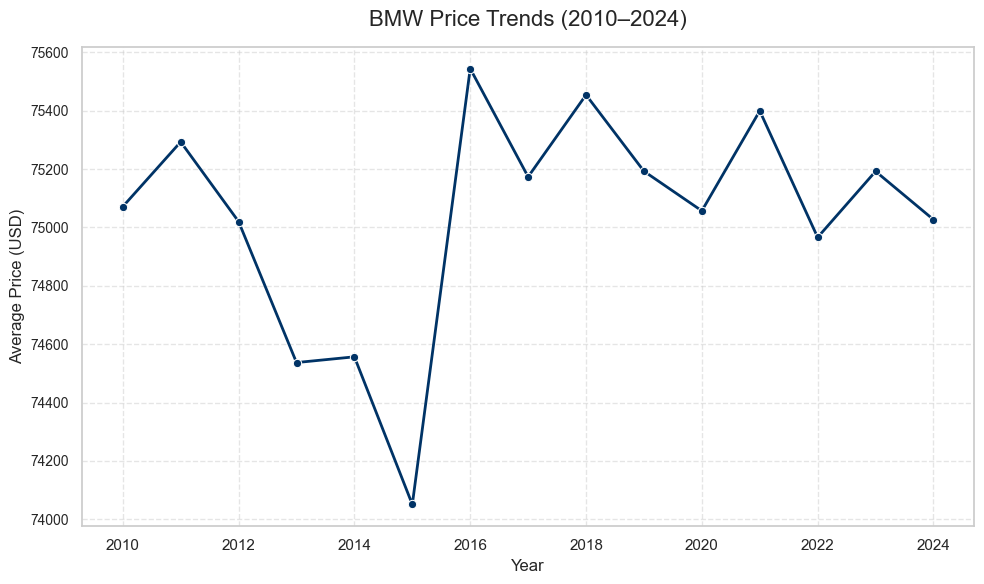

In [127]:
# Average Price Trend by Year 
yearly_avg = df.groupby('Year')['Price_USD'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.lineplot(
    x='Year',
    y='Price_USD',
    data=yearly_avg,
    marker='o',
    color='#003366', 
    linewidth=2.0
)

plt.title("BMW Price Trends (2010–2024)", fontsize=16, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Price (USD)", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

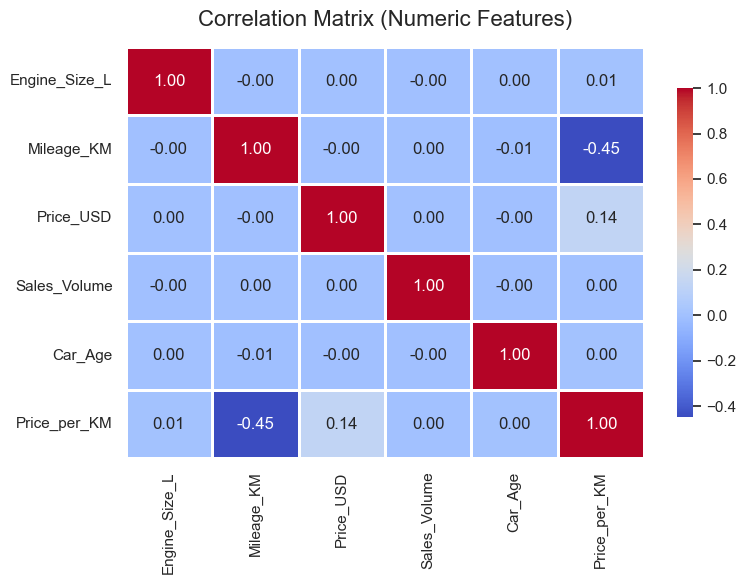

In [119]:
# Correlation Heatmap   
# Numeric columns for correlation 
num_cols = ['Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Car_Age', 'Price_per_KM']

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[num_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',  
    linewidths=0.8,
    linecolor='white',
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix (Numeric Features)", fontsize=16, pad=15)
plt.tight_layout()
plt.show()


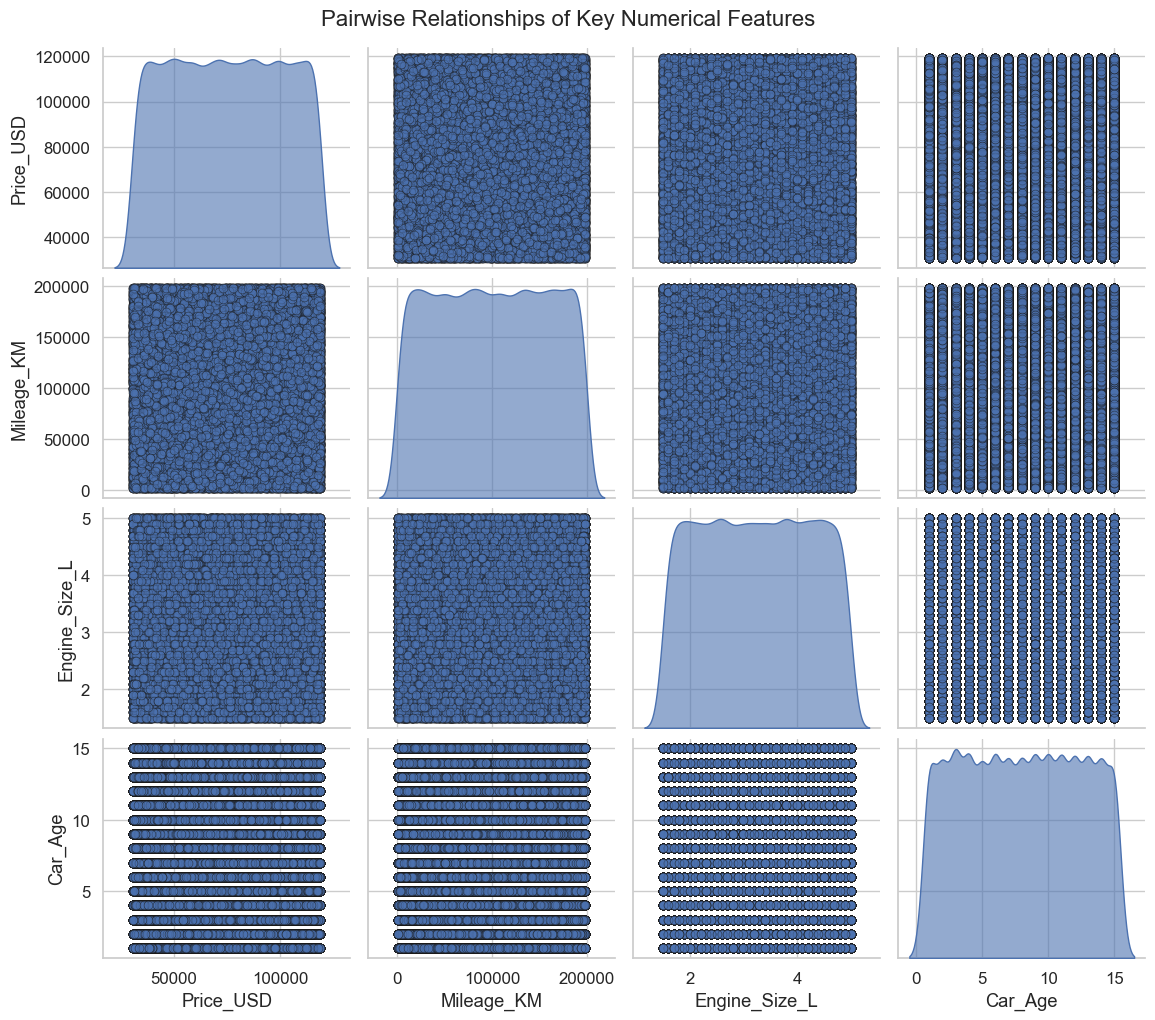

In [129]:
# Pairplot for Key Numerical Features 
# Key numerical features 
num_features = ['Price_USD', 'Mileage_KM', 'Engine_Size_L', 'Car_Age']

# Pairplot
sns.set(style="whitegrid", font_scale=1.1)
pairplot_fig = sns.pairplot(
    df[num_features],
    diag_kind='kde',
    plot_kws={'alpha':0.6, 's':40, 'edgecolor':'k'},
    diag_kws={'shade':True, 'alpha':0.6}
)

pairplot_fig.fig.suptitle("Pairwise Relationships of Key Numerical Features", fontsize=16, y=1.02)
pairplot_fig.fig.set_size_inches(12, 10)
plt.show()


## PCA + Feature Importance

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# Select numeric features for PCA/Modeling
features = ['Engine_Size_L','Mileage_KM','Sales_Volume','Car_Age']
X_num = df[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

pca = PCA(n_components=3)
pca_res = pca.fit_transform(X_scaled)
print("Explained variance ratios:", pca.explained_variance_ratio_)

# Random Forest feature importance for Price (log target)
X_model = df[features + ['Total_Sales_Model']]  
y = df['log_Price_USD'].fillna(df['log_Price_USD'].median())

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_model.fillna(0), y)
importances = pd.Series(rf.feature_importances_, index=X_model.columns).sort_values(ascending=False)
print(importances)

Explained variance ratios: [0.25301259 0.25026363 0.24907334]
Mileage_KM           0.308223
Sales_Volume         0.302352
Engine_Size_L        0.167998
Car_Age              0.122695
Total_Sales_Model    0.098732
dtype: float64


## Encoding & modeling

In [107]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
df_model = df.copy()
# Categorical columns to encode 
cat_cols = ['Region', 'Model', 'Fuel_Type', 'Transmission', 'Color']
# Convert categorical variables to dummies
df_model = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)
# Create log-transformed columns safely
for col in ['Price_USD', 'Sales_Volume']:
    new_col = 'log_' + col
    df_model[new_col] = df_model[col].apply(lambda x: np.log(x) if pd.notnull(x) and x > 0 else 0)

# Ensure all columns are numeric (no categories)
for col in df_model.columns:
    if df_model[col].dtype.name == 'category':
        df_model[col] = df_model[col].astype(str)

# Select features for modeling
feature_cols = [c for c in df_model.columns if c not in ['Price_USD', 'log_Price_USD']]

# Keep only numeric columns for scaling
X = df_model[feature_cols].select_dtypes(include='number').fillna(0)

# Standardize numeric features 
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Target variable 
y = df_model['log_Price_USD']

# Combine scaled features with target 
df_ready = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

# Save CSV in existing data
os.makedirs("data", exist_ok=True)
output_path = "data/bmw_modeling_ready_scaled.csv"
df_ready.to_csv(output_path, index=False)
